In [2]:
%reload_ext autoreload
%autoreload 2

import sys
sys.path.append(r"E:/fulin/RiskControl/RiskControl/")

import os
import pandas as pd 
import numpy as np  
import math  
import matplotlib.pyplot as plt
import copy
import seaborn as sns
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False  

FILE_PATH = 'E:/fulin/test/up1/'
DATA_PATH = 'E:/fulin/test/'
# FILE_PATH = 'C:/Users/86156/Desktop/fulin/new data/'
# OLD_PATH = 'E:/fulin/shiyan/'


isExists=os.path.exists(FILE_PATH)
if not isExists:
    os.makedirs(FILE_PATH) 

import warnings
warnings.filterwarnings("ignore")

E:\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data_all = pd.read_pickle(DATA_PATH + 'data_all.pkl')
data_all

,apply_date,uniq_id,mob_hash,certno_hash,id,cust_id,ext1,ext2,ext3,aft_v3_score,...,highirr_v6_20220425_score,lowirr_v6_20220425_score,model_risk_v7_ghighirr_score,model_risk_v7_glowirr_score,model_risk_v7_gtongyong_score,tongyong_v6_20220425_score,weight,target,month_time,day_time
0,20220401,2099233,e7bc76a402517fbf3036b256d15b51e9974470a6aa845d...,31524180100b9ce333248ffc647fd9466124a7ae562358...,163865,FLKJ1V420240821,NaN,NaN,NaN,6.324,...,23.0,17.0,22.0,22.0,16.0,16.0,1,valid,2022-04,2022-04-01
1,20220401,2099235,8c8d5af37f32103b111889a0d604b74d664581beaa57e9...,286ddfec1fbe8fcff9b6a7cbdaaf35439b0f24a3cb4258...,119504,FLKJ1V420240821,NaN,NaN,NaN,35.158,...,24.0,19.0,33.0,35.0,23.0,21.0,1,train,2022-04,2022-04-01
9,20220401,2099237,6e03b7cd851ed58b43f4771cc9a4e27171b74d5452b72f...,8d30915e69efe72beba0efd469a46035d519758e975d67...,186847,FLKJ1V420240821,NaN,NaN,NaN,7.018,...,13.0,8.0,19.0,24.0,17.0,13.0,1,train,2022-04,2022-04-01
10,20220401,2099245,b46bc762eaa18d7d8c516262387686cd70ed4d8bf9cc4a...,c74b8709345e681ed16a206f6f7c3b6a6155a9237278ef...,174600,FLKJ1V420240821,NaN,NaN,NaN,30.737,...,30.0,35.0,32.0,29.0,24.0,34.0,1,valid,2022-04,2022-04-01
11,20220401,2099248,8afb0790eec39a41291e0ebd533b23156906cf57e70079...,a999acb1d285ca908f1c901e95a41062c758e9d6d759fe...,187674,FLKJ1V420240821,NaN,NaN,NaN,52.025,...,16.0,15.0,28.0,35.0,22.0,14.0,1,valid,2022-04,2022-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462383,20230131,2206002,285c71b24a6324c49e1276aaad828d223eab365ff0ffb4...,03d656f6ec002af3f1e9a8c82d74b6dc4c88a1ce03de2e...,140180,FLKJ1V420240821,NaN,NaN,NaN,24.213,...,35.0,31.0,55.0,63.0,55.0,33.0,1,train,2023-01,2023-01-31
462384,20230131,2206005,fd589b04ab3bd57385135a56f260f2fe50317f0abfcf98...,87a4e96de20e5e92a75469c55a98fcefd944b49770edd5...,132010,FLKJ1V420240821,NaN,NaN,NaN,63.775,...,50.0,46.0,39.0,45.0,38.0,47.0,1,train,2023-01,2023-01-31
462385,20230131,2206010,8add4cd9b3032113fda347be2f284d02febc3d40372ec2...,654ef66a24ce9c3210a313f8e1ce22383bff9cd42b654e...,185716,FLKJ1V420240821,NaN,NaN,NaN,10.415,...,22.0,21.0,26.0,26.0,27.0,22.0,1,train,2023-01,2023-01-31
462386,20230131,2206013,38ba319b793d3504d1e6f13be9b30fd9fe0b519582aaf6...,b156e30fb87f6dbe5b3ec407e9f26a6b904bf19d6a9fae...,207706,FLKJ1V420240821,NaN,NaN,NaN,59.259,...,51.0,51.0,37.0,46.0,35.0,46.0,1,valid,2023-01,2023-01-31


In [4]:
ex_lst = ['apply_date','uniq_id','mob_hash','certno_hash','id','cust_id','ext1','ext2','ext3','aft_v3_score','aft_v3up1_score',
          'aft_v3up3_score','aft_v3up4_score','aft_v3up5_score',
          'aft_v4_score',
#  'aft_v4up1_score',
 'aft_v4up2_score',
 'mobile','date','source','label','index','name_sha256','idcard_sha256','mobile_sha256',
 'weight',
 'target',
 'month_time',
 'day_time']
diff=data_all.filter(like='diff').columns
ex_lst.extend(diff)
print(ex_lst)
ft_lst = [i for i in data_all.columns if i not in ex_lst]
len(ft_lst)

['apply_date', 'uniq_id', 'mob_hash', 'certno_hash', 'id', 'cust_id', 'ext1', 'ext2', 'ext3', 'aft_v3_score', 'aft_v3up1_score', 'aft_v3up3_score', 'aft_v3up4_score', 'aft_v3up5_score', 'aft_v4_score', 'aft_v4up2_score', 'mobile', 'date', 'source', 'label', 'index', 'name_sha256', 'idcard_sha256', 'mobile_sha256', 'weight', 'target', 'month_time', 'day_time']


12

### baseline

num_features:  12
逻辑回归：
valid_auc :  0.7608642649300142  valid_ks :  0.3925279737455975
recall:  [0.66277623 0.72497897]
train_auc :  0.7617535795197901  train_ks :  0.394600269107799
recall:  [0.66653741 0.72409443]
oot_auc :  0.7040192544231298  oot_ks :  0.2973631989332582
recall:  [0.53365734 0.74818771]


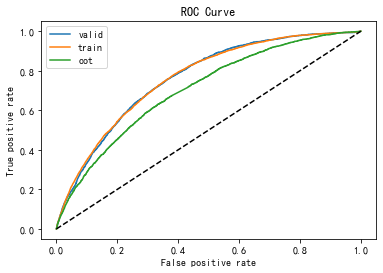

XGBoost：
[0]	train-rmse:0.38173	eval-rmse:0.38212
[100]	train-rmse:0.19054	eval-rmse:0.21847
[200]	train-rmse:0.17396	eval-rmse:0.22134
[213]	train-rmse:0.17218	eval-rmse:0.22164
valid_auc :  0.7072237682210504  valid_ks :  0.3328324190599179
train_auc :  0.9170835648125532  train_ks :  0.660067317252441
oot_auc :  0.6333366453546599  oot_ks :  0.20911996367110897


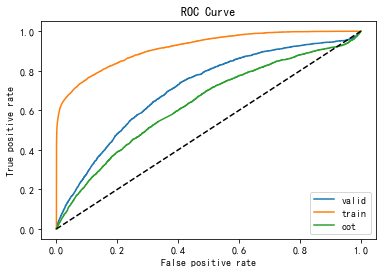

LightGBM：
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000739 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1893
[LightGBM] [Info] Number of data points in the train set: 108706, number of used features: 12
[LightGBM] [Info] Start training from score 0.051046
valid_auc :  0.7144985105545262  valid_ks :  0.33714563879662707
train_auc :  0.9558696739395912  train_ks :  0.7686555797502403
oot_auc :  0.6473697305500963  oot_ks :  0.22846869579225926


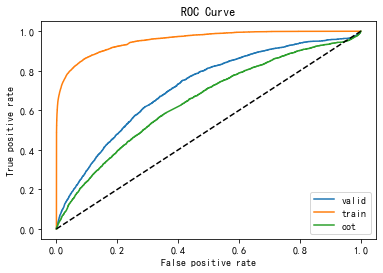

GBDT：
valid_auc :  0.7649139061499162  valid_ks :  0.39930137377948577
recall:  [0.99975119 0.00462574]
train_auc :  0.7741822472089037  train_ks :  0.40641133500800525
recall:  [0.99996122 0.00955127]
oot_auc :  0.7048048637444766  oot_ks :  0.303253551022932
recall:  [0.99952307 0.0022892 ]


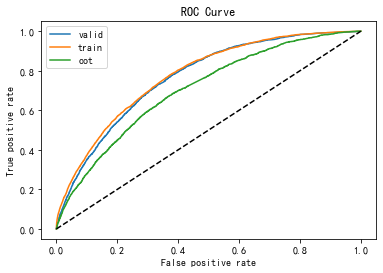

In [4]:
from Model.train import bi_train
res =  bi_train(data_all.fillna(-999), dep='label', exclude=ex_lst, model_switch=[1, 1, 1, 1])

## 特征筛选

#### round 1 missing std freq

In [5]:
train = data_all[data_all['target']=='train']
valid = data_all[data_all['target']=='valid']
oot = data_all[data_all['target']=='oot']

In [6]:
from FeatureEngineering.Selection.Filter import Filter
filter_ = Filter(data_all, 'label', ex_lst, FILE_PATH)

In [7]:
r1_keep = filter_.round_1({'missing': 0.95, 'std':0, 'freq': 0.95}) # 基于训练集

missing   num_drop: 0,   num_keep: 12 
std   num_drop: 0,   num_keep: 12 
freq   num_drop: 0,   num_keep: 12 


In [8]:
ftr1_keep = r1_keep['freq'].keep_lst
print(len(ftr1_keep))

12


#### round 2 iv psi

In [10]:
import sys
sys.setrecursionlimit(100000) #例如这里设置为十万

from ScoreCard.CreatReport import Report
# ceshi_lst=['label','target']
for i in range((len(ft_lst) // 1000) + 1):
    start, end = i * 1000, min((i + 1) * 1000, len(ft_lst))
    print(start, ' - ', end)
    report = Report(data_all[ft_lst[start:end] + ex_lst].fillna(-999), ex_lst, 'label', FILE_PATH + str(i) + '_')
#     key_value, bins_detail = report.iv_ks_psi()
#     key_value, bins_detail = report.iv_ks_psi_chi2()
    key_value, bins_detail = report.iv_ks_psi_chi2_missing_quantile()

0  -  12
正在计算IV......
正在计算CHI2......
正在计算COVER RATE......
正在计算QUANTILE......
正在转存......


In [11]:
import os
files_key_value, files_bins_detail = [], []
for root, dirs, files in os.walk(FILE_PATH[:-1]): 
    for file in files:
        if '_bins_detail' in file:
            files_bins_detail.append(pd.read_csv(root +'/'+ file, encoding='utf-8-sig'))
        elif 'iv_ipt_psi_chi2_missing' in file:
            files_key_value.append(pd.read_csv(root +'/'+ file, encoding='utf-8-sig'))
            
key_value = pd.concat(files_key_value)
bins_detail = pd.concat(files_bins_detail)

bins_detail.to_csv(FILE_PATH + 'bins_detail_up1.csv', index=False, encoding='utf-8-sig')
key_value.to_csv(FILE_PATH + 'key_value_up1.csv', index=False, encoding='utf-8-sig')

In [12]:
key_value = key_value[key_value['var_names'].isin(ftr1_keep)]
key_value.sort_values(by='iv_bin_oot',ascending=False)

,var_names,ks,iv_bin_oot,iv_bin_total,iv_bin_train,iv_bin_valid,psi_tv_bin,psi_to_bin,psi_tvo_bin,chi2,...,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99,max
0,aft_v4up1_score,0.333150,0.494425,0.659845,0.725232,0.725130,0.000056,0.017793,0.017727,89.647311,...,45.49662,47.71306,49.7663,51.75082,53.84029,56.18386,59.30963,61.81082,66.336871,80.9168
4,lowirr_v6_20220425_score,0.304893,0.335473,0.625114,0.722462,0.743654,0.000247,0.224234,0.225290,2.242286,...,24.00000,31.00000,37.0000,44.00000,51.00000,58.00000,66.00000,72.00000,81.000000,91.0000
1,tongyong_v6_20220425_score,0.310679,0.310035,0.629698,0.745547,0.741918,0.000252,0.216193,0.218594,1.934764,...,25.00000,31.00000,37.0000,43.00000,49.00000,56.00000,63.00000,69.00000,77.000000,90.0000
3,91829_score,0.305826,0.306454,0.632273,0.747839,0.747706,0.000052,0.197908,0.197852,18.486821,...,533.00000,562.00000,589.0000,615.00000,644.00000,679.00000,727.00000,767.00000,837.000000,900.0000
7,fx_score_v01,0.290753,0.287573,0.550347,0.651975,0.639980,0.000257,0.195959,0.195574,16.785873,...,633.00000,663.00000,690.0000,717.00000,746.00000,779.00000,823.00000,858.00000,900.000000,900.0000
5,model_risk_v7_gtongyong_score,0.304196,0.256056,0.605228,0.721122,0.765883,0.000213,0.201503,0.202764,1.873378,...,26.00000,32.00000,37.0000,43.00000,49.00000,55.00000,63.00000,69.00000,78.000000,92.0000
10,highirr_v6_20220425_score,0.274959,0.243268,0.578623,0.704170,0.708820,0.000187,0.183354,0.185311,1.659187,...,27.00000,33.00000,39.0000,45.00000,50.00000,56.00000,63.00000,68.00000,76.000000,91.0000
2,model_risk_v7_glowirr_score,0.306866,0.237754,0.582300,0.706158,0.736618,0.000242,0.169856,0.171571,1.541804,...,34.00000,39.00000,44.0000,49.00000,54.00000,59.00000,66.00000,71.00000,79.000000,93.0000
6,model_risk_v7_ghighirr_score,0.297754,0.237621,0.557019,0.675273,0.701202,0.000067,0.135025,0.135701,1.463426,...,31.00000,36.00000,41.0000,46.00000,51.00000,56.00000,63.00000,68.00000,77.000000,93.0000
9,91828_score,0.287629,0.217266,0.553849,0.662857,0.711839,0.000346,0.176665,0.177248,18.394483,...,507.00000,538.00000,568.0000,598.00000,631.00000,670.00000,727.00000,774.00000,853.000000,900.0000


In [13]:
key_value['psi_tvo_bin'].max()

0.2252901064170568

In [14]:
# key_value = key_value[key_value['psi_tvo_bin'] < 0.1]
iv_keep = key_value[key_value['iv_bin_train'] > 0.02]['var_names'].to_list()
len(iv_keep)

12

#### round 3 feature_importance

In [15]:
from FeatureEngineering.KeyValue import Importance
ipt_value = Importance.value(data_all[iv_keep + ex_lst].fillna(-999), 'train', 'valid', dep='label', exclude=ex_lst, model_switch=[1, 1, 1, 1, 1])
ipt_value.sort_values(by='xgb_gain', ascending=False)

,var_names,lr_coef,xgb_gain,xgb_weight,xgb_total_cover,xgb_cover,lgb_split,lgb_gain,rf,gbdt
0,aft_v4up1_score,0.066108,89207.546875,3552.0,6.876111e+06,1935.842041,3222,146830.203787,0.130215,0.432751
3,91829_score,-0.002943,24511.689453,2133.0,3.129088e+06,1466.989014,2385,43783.386041,0.093503,0.066130
1,tongyong_v6_20220425_score,-0.006546,15551.820312,1001.0,1.502239e+06,1500.738159,1384,39065.772511,0.070279,0.077155
2,model_risk_v7_glowirr_score,0.014271,14821.062500,1182.0,1.704855e+06,1442.347412,1683,32030.623567,0.067432,0.080041
4,lowirr_v6_20220425_score,0.007614,13744.298828,1305.0,1.611801e+06,1235.096802,1921,16297.775015,0.074527,0.072834
5,model_risk_v7_gtongyong_score,-0.013129,12482.776367,1107.0,1.146524e+06,1035.703613,1583,15052.486235,0.068562,0.047446
10,highirr_v6_20220425_score,0.001593,8817.362305,1065.0,1.033694e+06,970.604553,1454,12915.055144,0.069617,0.065255
8,fx_score_v03,-0.002568,7847.782715,1624.0,1.261711e+06,776.915405,2566,16622.487835,0.092917,0.032368
9,91828_score,-0.000722,7388.893066,1691.0,1.136227e+06,671.925903,2103,13416.770267,0.093482,0.022479
7,fx_score_v01,-0.000604,7248.057129,1652.0,1.178008e+06,713.079590,2262,14284.946741,0.093566,0.029043


In [16]:
ipt_keep = ipt_value[ipt_value['xgb_gain'] > 0.0005]['var_names'].to_list()
len(ipt_keep)

12

#### round 4 bin woe

In [17]:
import toad
combiner = toad.transform.Combiner()
combiner.fit(train[ipt_keep + ex_lst].fillna(-999), train['label'], method='dt', min_samples=0.05, n_bins=6, exclude=ex_lst)
data_bin = combiner.transform(data_all[ipt_keep + ex_lst].fillna(-999))

train_bin = data_bin[data_bin['target'] == 'train']
valid_bin = data_bin[data_bin['target'] == 'valid']
oot_bin = data_bin[data_bin['target'] == 'oot']

num_features:  12
逻辑回归：
valid_auc :  0.7608203827356765  valid_ks :  0.39526805462428155
recall:  [0.69098188 0.69259882]
train_auc :  0.7641365837930312  train_ks :  0.3964704245520023
recall:  [0.69517338 0.69111552]
oot_auc :  0.7024275519091108  oot_ks :  0.29859416348999135
recall:  [0.6089435  0.68370851]


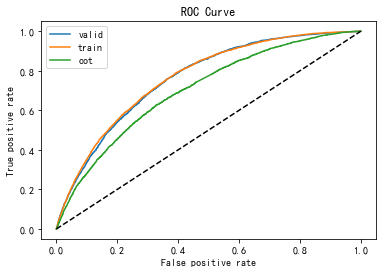

XGBoost：
[0]	train-rmse:0.38192	eval-rmse:0.38223
[100]	train-rmse:0.20274	eval-rmse:0.21826
[200]	train-rmse:0.19668	eval-rmse:0.22051
[210]	train-rmse:0.19613	eval-rmse:0.22076
valid_auc :  0.6988692204838716  valid_ks :  0.3226318990708959
train_auc :  0.8720308938538577  train_ks :  0.579996144532045
oot_auc :  0.6412622225631194  oot_ks :  0.2262024812310897


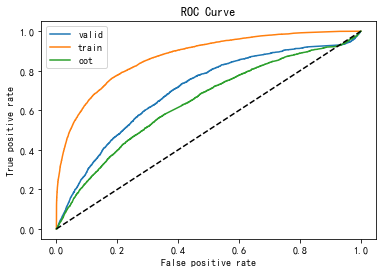

LightGBM：
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001908 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 72
[LightGBM] [Info] Number of data points in the train set: 108706, number of used features: 12
[LightGBM] [Info] Start training from score 0.051046
valid_auc :  0.7079966217891689  valid_ks :  0.3342225434384263
train_auc :  0.8854721769823273  train_ks :  0.6135741076978662
oot_auc :  0.6495787653029425  oot_ks :  0.23562799944877244


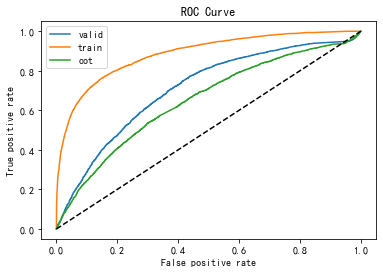

GBDT：
valid_auc :  0.7623809946943968  valid_ks :  0.3994099402401272
recall:  [1. 0.]
train_auc :  0.772270145159415  train_ks :  0.40455627167671104
recall:  [1. 0.]
oot_auc :  0.7009973158503433  oot_ks :  0.2981219599994011
recall:  [1. 0.]


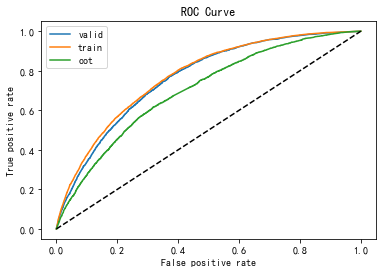

In [17]:
from Model.train import bi_train
res =  bi_train(data_bin[ipt_keep + ex_lst], dep='label', exclude=ex_lst, model_switch=[1, 1, 1, 1])

In [18]:
transer = toad.transform.WOETransformer()
transer.fit(train_bin, train_bin['label'], exclude=ex_lst)
data_woe = transer.transform(data_bin)

num_features:  12
逻辑回归：
valid_auc :  0.7608178764046464  valid_ks :  0.3955715346920254
recall:  [0.65755129 0.73170732]
train_auc :  0.7650979491142763  train_ks :  0.3970847935645539
recall:  [0.66251442 0.72859975]
oot_auc :  0.7032250191737354  oot_ks :  0.2959090173675501
recall:  [0.56656523 0.72605876]


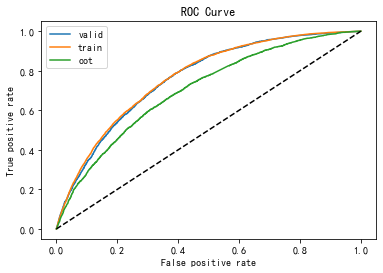

XGBoost：
[0]	train-rmse:0.38192	eval-rmse:0.38223
[100]	train-rmse:0.20274	eval-rmse:0.21824
[200]	train-rmse:0.19668	eval-rmse:0.22049
[211]	train-rmse:0.19609	eval-rmse:0.22076
valid_auc :  0.6989037764635027  valid_ks :  0.3226092802656212
train_auc :  0.8720308938538577  train_ks :  0.579996144532045
oot_auc :  0.6412227018621399  oot_ks :  0.2262479027427176


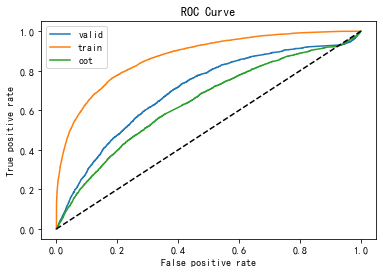

LightGBM：
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002461 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 84
[LightGBM] [Info] Number of data points in the train set: 108706, number of used features: 12
[LightGBM] [Info] Start training from score 0.051046
valid_auc :  0.7079966217891689  valid_ks :  0.3342225434384263
train_auc :  0.8854721769823273  train_ks :  0.6135741076978662
oot_auc :  0.6495787653029425  oot_ks :  0.23562799944877244


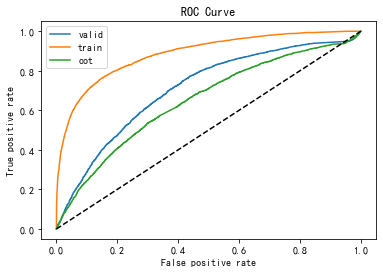

GBDT：
valid_auc :  0.762226672235953  valid_ks :  0.3973499263671332
recall:  [1. 0.]
train_auc :  0.7721478578162523  train_ks :  0.40547368137196854
recall:  [1. 0.]
oot_auc :  0.700580095610809  oot_ks :  0.298757826502511
recall:  [1. 0.]


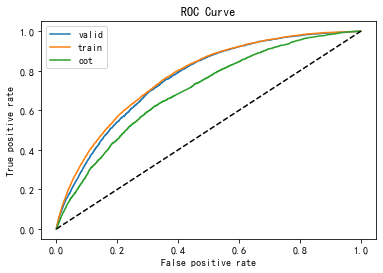

In [19]:
res =  bi_train(data_woe[ipt_keep + ex_lst], dep='label', exclude=ex_lst, model_switch=[1, 1, 1, 1])

#### round 5 分箱后 iv, corr

In [19]:
train_woe = data_woe[data_woe['target'] == 'train']
valid_woe = data_woe[data_woe['target'] == 'valid']
oot_woe = data_woe[data_woe['target'] == 'oot']

In [20]:
dev_slct1, drop_lst= toad.selection.select(train_woe, train_woe['label'], 
                                           empty=0.95,
                                           iv=0.05, 
                                           corr=0.90, 
                                           return_drop=True, 
                                           exclude=ex_lst)  
print("keep:", dev_slct1.shape[1],  
      "drop empty:", len(drop_lst['empty']), 
      "drop iv:", len(drop_lst['iv']),  
      "drop corr:", len(drop_lst['corr'])) 

keep: 36 drop empty: 0 drop iv: 0 drop corr: 4


In [21]:
ft = [i for i in dev_slct1.columns if i not in ex_lst]
ft
# pd.DataFrame({'var_names': ft}).to_csv(FILE_PATH + 'r5_woe_iv_corr.csv')

['aft_v4up1_score',
 'tongyong_v6_20220425_score',
 'model_risk_v7_glowirr_score',
 '91829_score',
 'fx_score_v01',
 'fx_score_v03',
 '91828_score',
 '90281_score']

#### round 6 分箱后特征重要性

In [22]:
from FeatureEngineering.KeyValue import Importance
ipt_woe = Importance.value(data_woe[dev_slct1.columns], 'train', 'valid', dep='label', exclude=ex_lst)
ipt_woe.sort_values(by='xgb_gain', ascending=False)

,var_names,lr_coef,xgb_gain,xgb_weight,xgb_total_cover,xgb_cover,lgb_split,lgb_gain,rf,gbdt
0,aft_v4up1_score,0.606682,75481.101562,1956.0,5353187.000,2736.803223,2857,141500.706052,0.125305,0.477272
1,tongyong_v6_20220425_score,0.156349,28354.677734,1718.0,2739746.000,1594.729858,3227,40118.053311,0.094370,0.183021
3,91829_score,0.338187,24056.876953,2007.0,3212320.250,1600.558228,3429,43965.957921,0.111689,0.087893
2,model_risk_v7_glowirr_score,0.099766,21459.730469,2047.0,2617536.000,1278.718140,3410,29932.922228,0.097666,0.149392
5,fx_score_v03,0.184407,7368.451660,2065.0,1787075.000,865.411621,3493,14329.756910,0.138807,0.048882
4,fx_score_v01,0.111029,5287.351562,1965.0,1445740.875,735.745972,3924,9726.770680,0.134602,0.018066
6,91828_score,0.066502,4702.386230,1882.0,1219037.125,647.734924,3063,8035.951594,0.125750,0.013308
7,90281_score,-0.072159,3439.307129,2076.0,1057778.750,509.527344,4192,8447.617161,0.171811,0.022165


In [23]:
ipt_keep_woe = ipt_woe[ipt_woe['xgb_gain'] > 0.0]['var_names'].to_list()
len(ipt_keep_woe)

8

num_features:  8
逻辑回归：
valid_auc :  0.7606477835596821  valid_ks :  0.39547106268188376
recall:  [0.65653344 0.73296888]
train_auc :  0.7649744284070998  train_ks :  0.3962671745480319
recall:  [0.66212666 0.72841954]
oot_auc :  0.7031058115342427  oot_ks :  0.29651317892769047
recall:  [0.56706486 0.72453262]


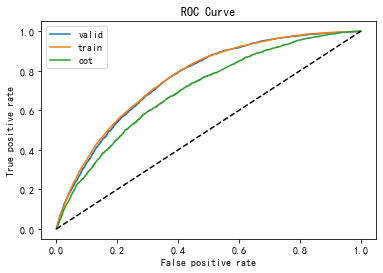

XGBoost：
[0]	train-rmse:0.38196	eval-rmse:0.38216
[100]	train-rmse:0.20644	eval-rmse:0.21719
[200]	train-rmse:0.20277	eval-rmse:0.21914
[213]	train-rmse:0.20243	eval-rmse:0.21941
valid_auc :  0.715064689307501  valid_ks :  0.34276528001595835
train_auc :  0.8507443420827822  train_ks :  0.5418952258912567
oot_auc :  0.6459951406087793  oot_ks :  0.23437015630961466


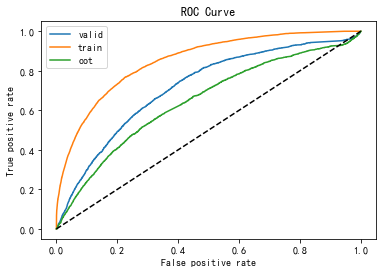

LightGBM：
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001498 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 56
[LightGBM] [Info] Number of data points in the train set: 108706, number of used features: 8
[LightGBM] [Info] Start training from score 0.051046
valid_auc :  0.7123385430586434  valid_ks :  0.34264218920054207
train_auc :  0.8651467468295508  train_ks :  0.5673644373493909
oot_auc :  0.652868952474923  oot_ks :  0.2376893666317667


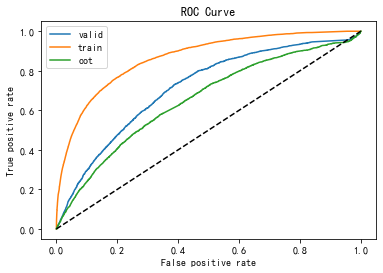

GBDT：
valid_auc :  0.76134156167042  valid_ks :  0.4005582298313735
recall:  [1. 0.]
train_auc :  0.7711745196051097  train_ks :  0.40293483299542854
recall:  [1. 0.]
oot_auc :  0.7011218827429727  oot_ks :  0.29914821581668194
recall:  [1. 0.]


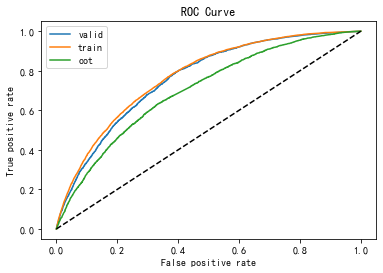

In [25]:
res =  bi_train(data_woe[ipt_keep_woe + ex_lst], dep='label', exclude=ex_lst, model_switch=[1, 1, 1, 1])

#### round 7 单调性

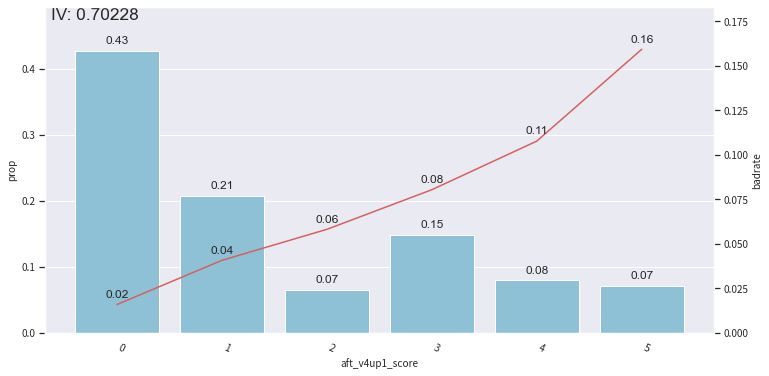

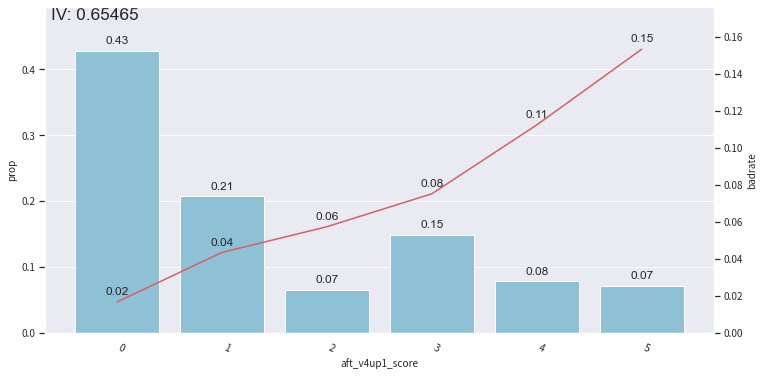

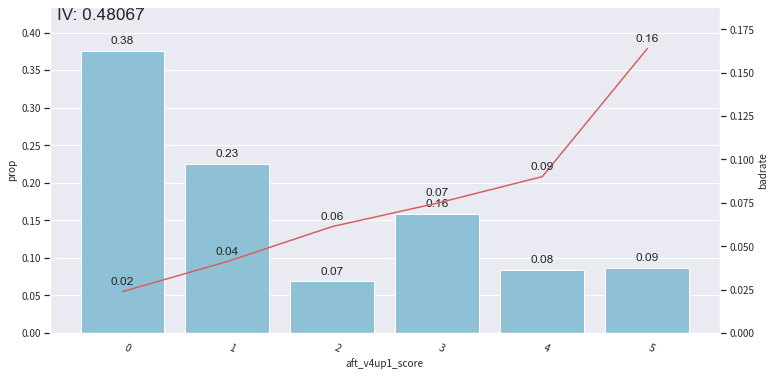

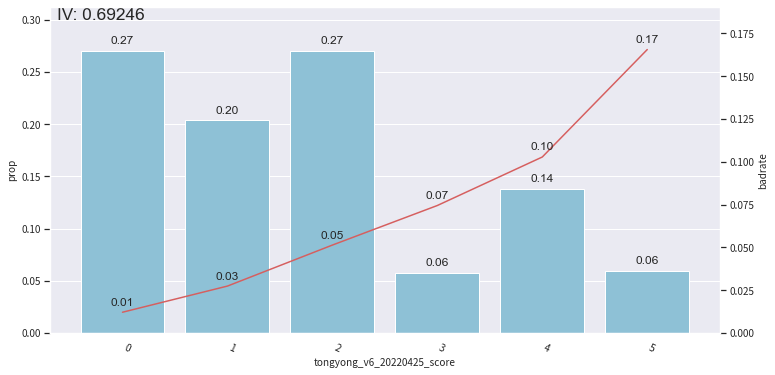

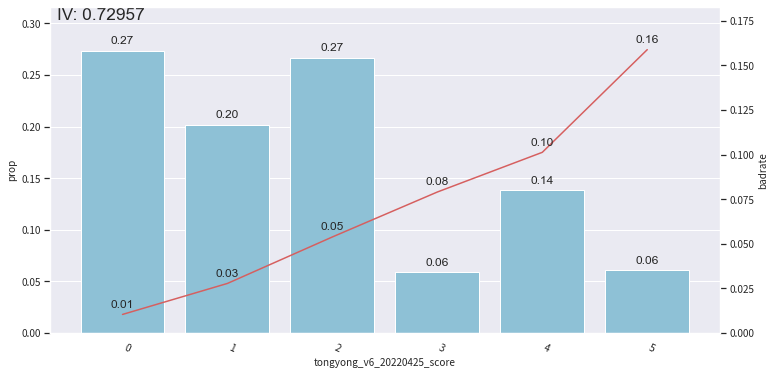

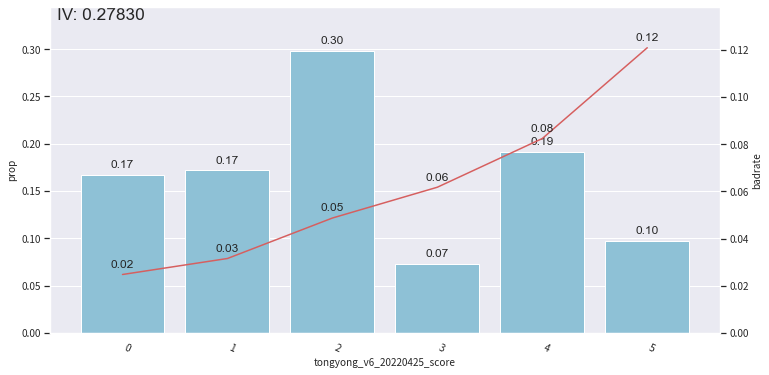

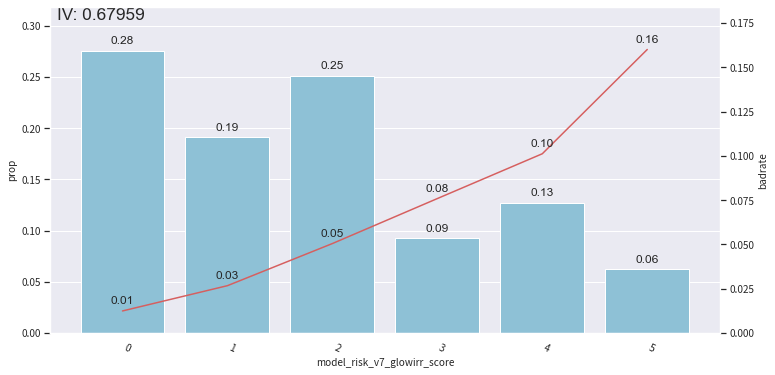

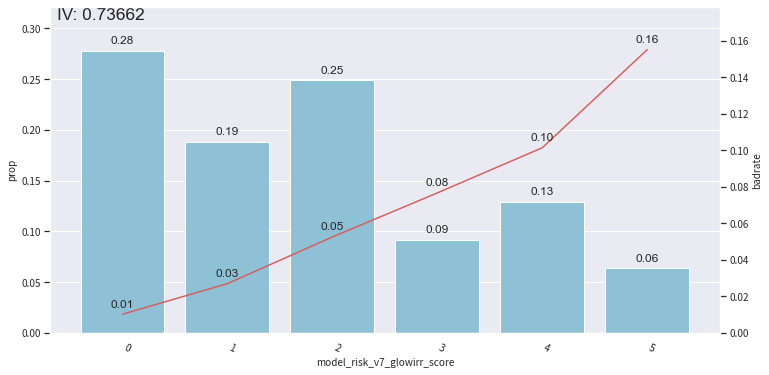

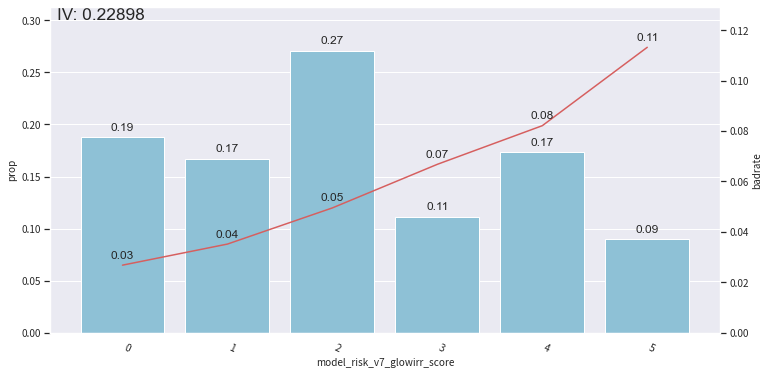

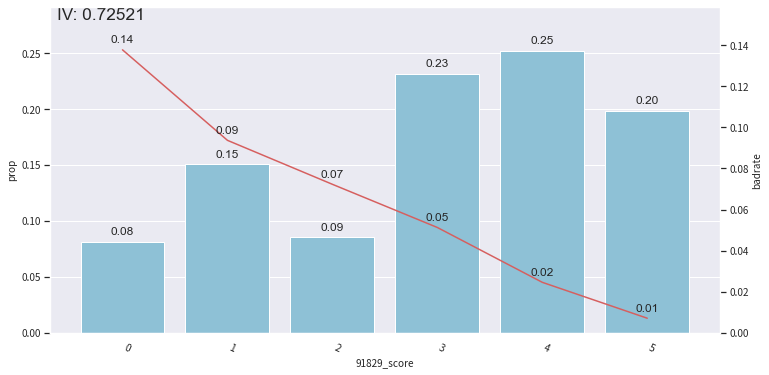

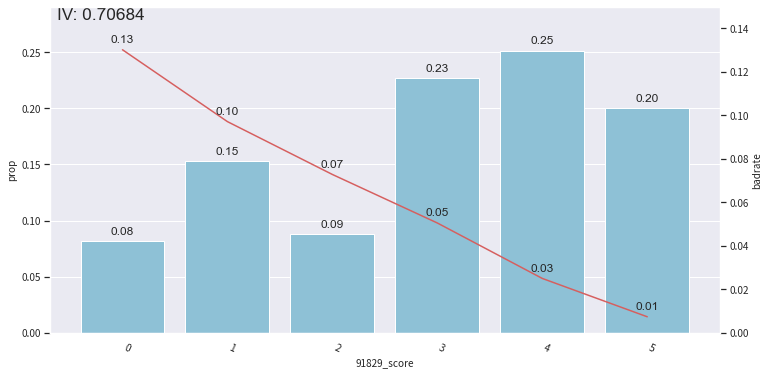

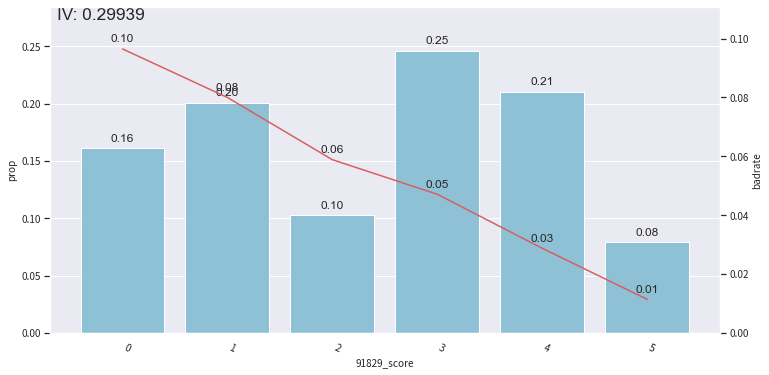

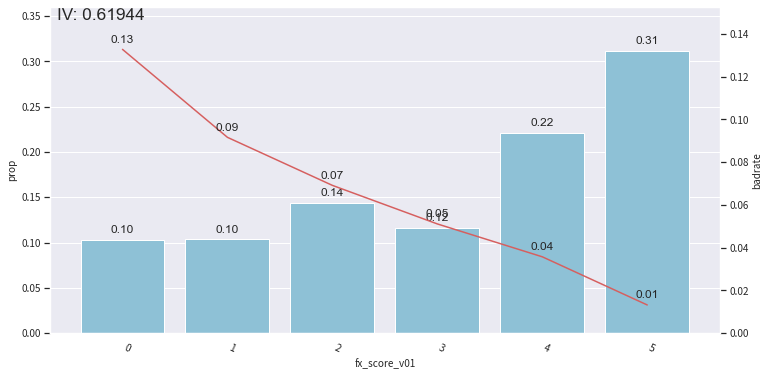

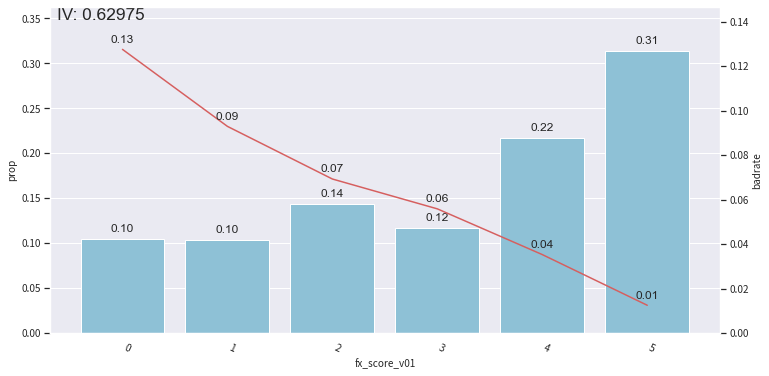

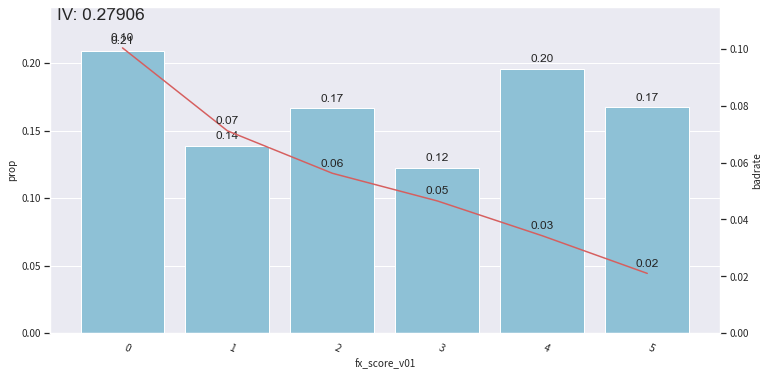

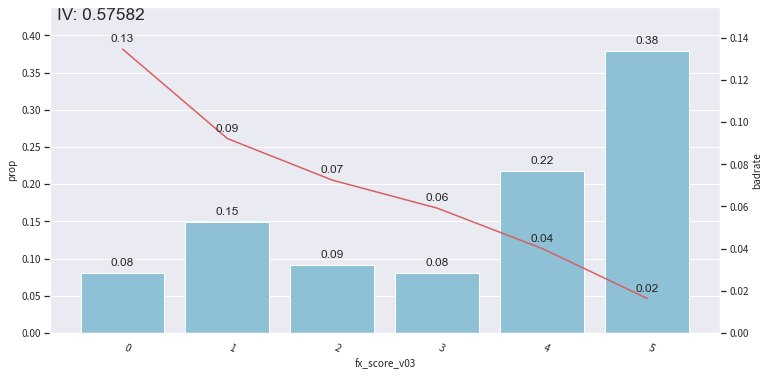

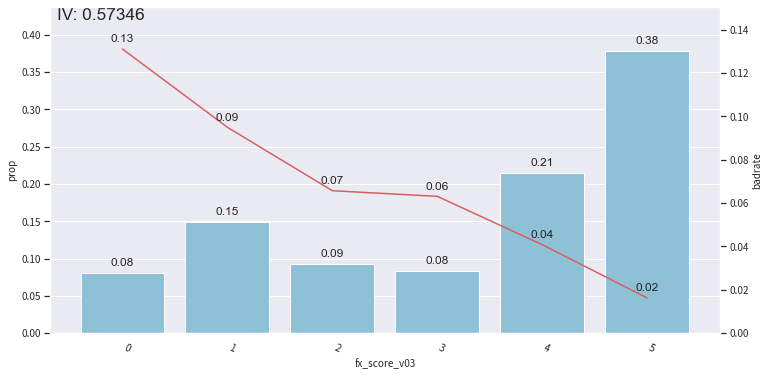

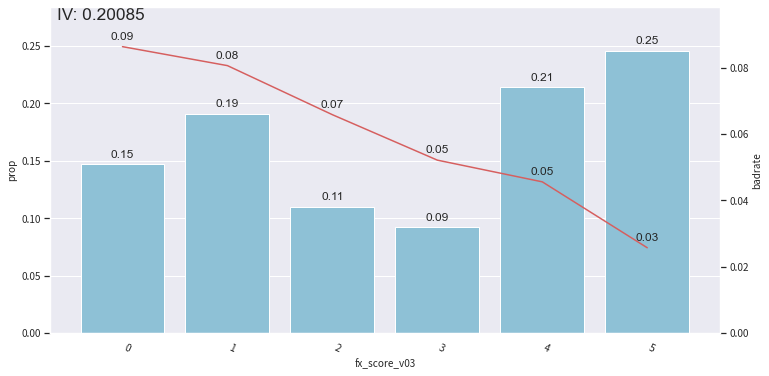

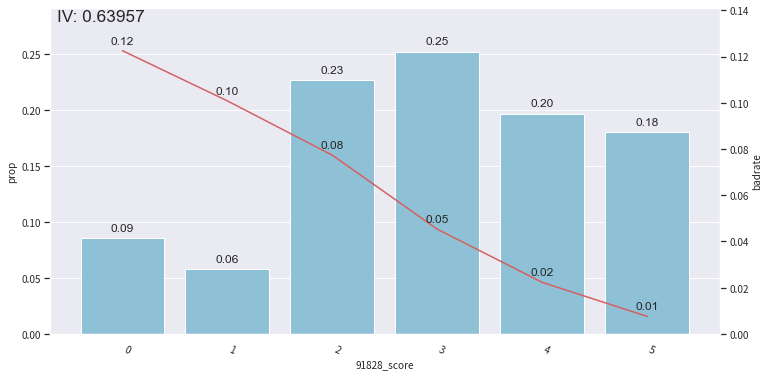

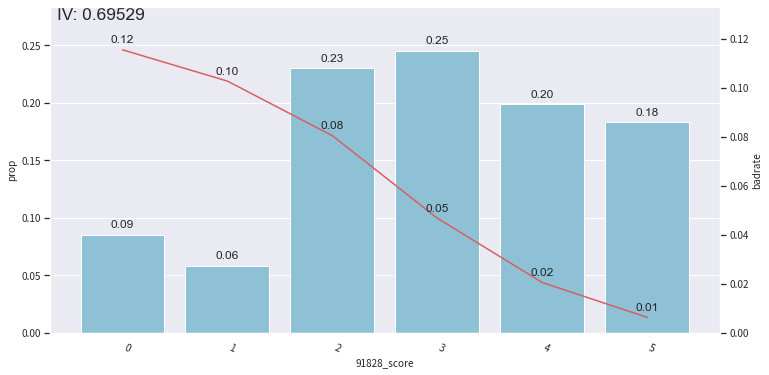

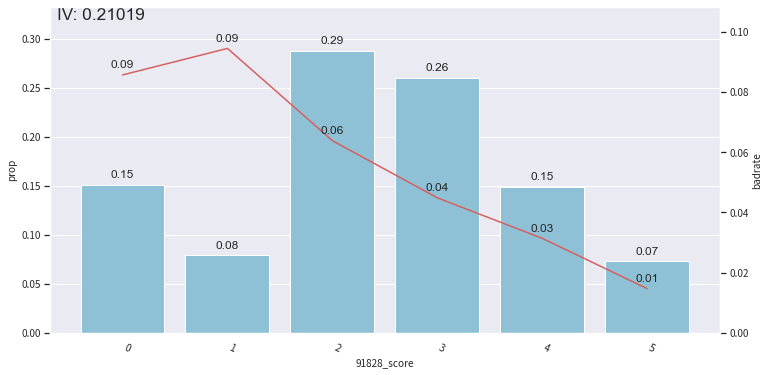

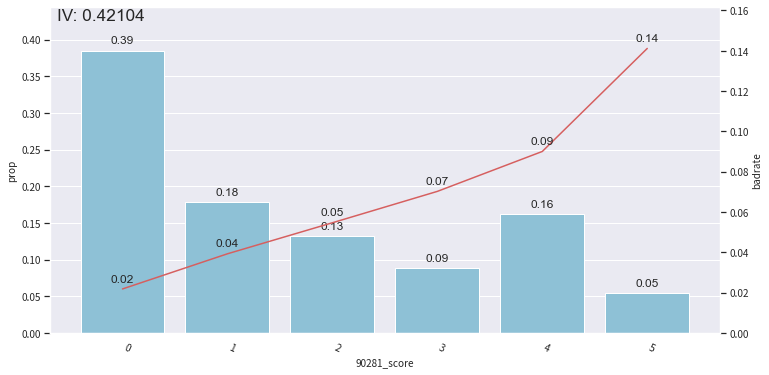

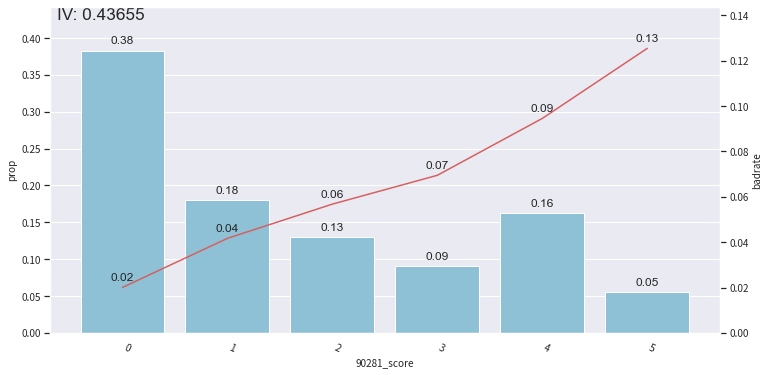

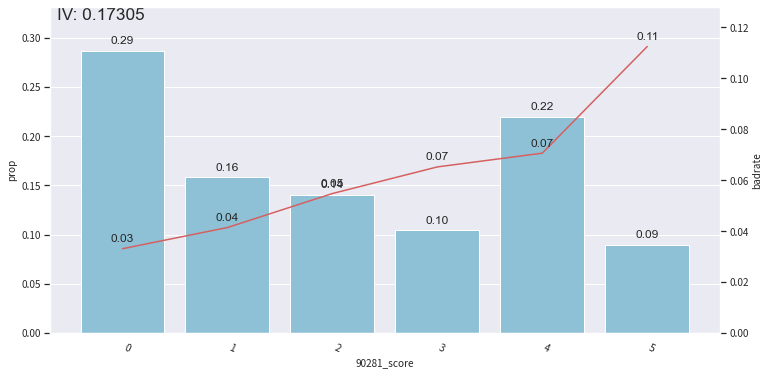

In [24]:
from toad.plot import bin_plot

for i in ipt_keep_woe:
    bin_plot(data_bin[data_bin['target']=='train'],  x=i, target='label')
    bin_plot(data_bin[data_bin['target']=='valid'],  x=i, target='label')
    bin_plot(data_bin[data_bin['target']=='oot'],  x=i, target='label')

In [25]:
from FeatureEngineering.KeyValue.Monotonicity import MonotonicityAdjuster
from FeatureEngineering.Bin.show_bin_detail import ShowBins
ma = MonotonicityAdjuster(ipt_keep_woe)
sb = ShowBins(data_all[ipt_keep_woe + ex_lst].fillna(-999), ex_lst, dep='label')
df_bins_dic = sb.datasets_binning_table('toad', combiner=combiner, transer=transer)
ma.classify(df_bins_dic)

print('adjust_lst : ', len(ma.adjust_lst))
print('ascending_lst : ', len(ma.ascending_lst))
print('descending_lst : ', len(ma.descending_lst))
print('peak_lst : ', len(ma.peak_lst))
print('valley_lst : ', len(ma.valley_lst))

adjust_lst :  1
ascending_lst :  4
descending_lst :  3
peak_lst :  0
valley_lst :  0


In [26]:
mono_keep = ma.ascending_lst + ma.descending_lst + ma.peak_lst +  ma.valley_lst 
len(mono_keep)

7

num_features:  7
逻辑回归：
valid_auc :  0.7604074278406371  valid_ks :  0.3947423528796526
recall:  [0.65802628 0.73170732]
train_auc :  0.7649845425161041  train_ks :  0.39642242992091625
recall:  [0.66300881 0.7264372 ]
oot_auc :  0.7031909487075545  oot_ks :  0.2975172785440494
recall:  [0.56790516 0.72644029]


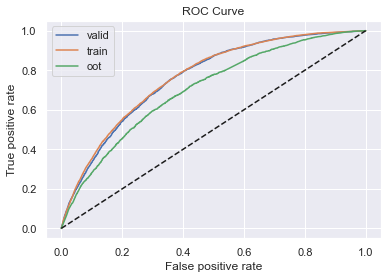

XGBoost：
[0]	train-rmse:0.38196	eval-rmse:0.38216
[100]	train-rmse:0.20785	eval-rmse:0.21706
[200]	train-rmse:0.20475	eval-rmse:0.21895
[211]	train-rmse:0.20452	eval-rmse:0.21907
valid_auc :  0.7140415022546802  valid_ks :  0.33792844159532476
train_auc :  0.841334624561802  train_ks :  0.5226490626233468
oot_auc :  0.6518989883116466  oot_ks :  0.23022725000942745


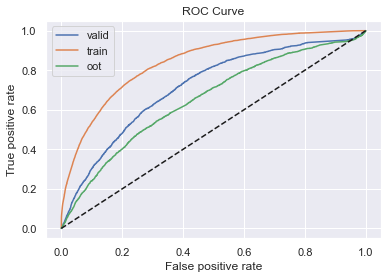

LightGBM：
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001481 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 49
[LightGBM] [Info] Number of data points in the train set: 108706, number of used features: 7
[LightGBM] [Info] Start training from score 0.051046
valid_auc :  0.7160158347997034  valid_ks :  0.34163642281292755
train_auc :  0.855679836856618  train_ks :  0.5581789151834313
oot_auc :  0.6516910562218841  oot_ks :  0.23006341369850403


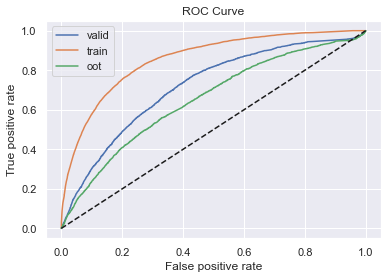

GBDT：
valid_auc :  0.7612499117552709  valid_ks :  0.3955771846374977
recall:  [1. 0.]
train_auc :  0.7704865444414692  train_ks :  0.4036198356819173
recall:  [1. 0.]
oot_auc :  0.7013869989735189  oot_ks :  0.301950736947996
recall:  [1. 0.]


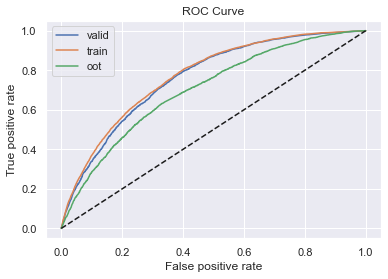

In [29]:
res =  bi_train(data_woe[mono_keep + ex_lst], dep='label', exclude=ex_lst, model_switch=[1, 1, 1, 1])

#### round 8 VIF

In [27]:
from FeatureEngineering.KeyValue.VIF import vif
vif_keep, res = vif(train_woe[mono_keep], threshold=10)

In [28]:
len(vif_keep)

7

num_features:  7
逻辑回归：
valid_auc :  0.7604074278406371  valid_ks :  0.3947423528796526
recall:  [0.65802628 0.73170732]
train_auc :  0.7649845425161041  train_ks :  0.39642242992091625
recall:  [0.66300881 0.7264372 ]
oot_auc :  0.7031909487075545  oot_ks :  0.2975172785440494
recall:  [0.56790516 0.72644029]


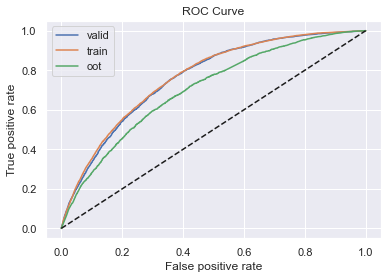

XGBoost：
[0]	train-rmse:0.38196	eval-rmse:0.38216
[100]	train-rmse:0.20785	eval-rmse:0.21706
[200]	train-rmse:0.20475	eval-rmse:0.21895
[212]	train-rmse:0.20449	eval-rmse:0.21909
valid_auc :  0.7140415022546802  valid_ks :  0.33792844159532476
train_auc :  0.841334624561802  train_ks :  0.5226490626233468
oot_auc :  0.6518989883116466  oot_ks :  0.23022725000942745


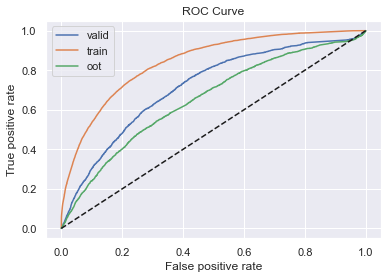

LightGBM：
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001253 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 49
[LightGBM] [Info] Number of data points in the train set: 108706, number of used features: 7
[LightGBM] [Info] Start training from score 0.051046
valid_auc :  0.7160158347997034  valid_ks :  0.34163642281292755
train_auc :  0.855679836856618  train_ks :  0.5581789151834313
oot_auc :  0.6516910562218841  oot_ks :  0.23006341369850403


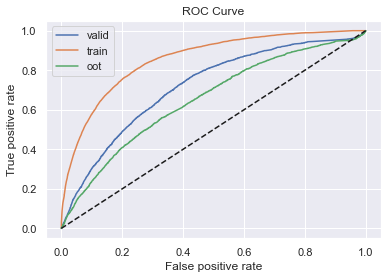

{'model_lr': LogisticRegression(C=0.1, class_weight='balanced', max_iter=2000, n_jobs=1,
                    solver='liblinear'),
 'model_xgb': <xgboost.core.Booster at 0x20af2aec280>,
 'model_lgb': <lightgbm.basic.Booster at 0x20a8fe64610>}

In [32]:
bi_train(data_woe[vif_keep + ex_lst], dep='label', exclude=ex_lst, model_switch=[1, 1, 1, 0])

#### round 9 coef

In [29]:
from FeatureEngineering.KeyValue.Coef import value
coef_keep = value(data_woe[vif_keep + ex_lst], 'label', ex_lst)

[0.60336857 0.14435476 0.10245445 0.36131777 0.08715239 0.21236181]


num_features:  6
逻辑回归：
valid_auc :  0.7604194173293035  valid_ks :  0.39701479138603607
recall:  [0.65825247 0.73044575]
train_auc :  0.7649724482114775  train_ks :  0.39739560828388976
recall:  [0.66335779 0.72445486]
oot_auc :  0.7030100251740194  oot_ks :  0.2965484278230171
recall:  [0.56831395 0.72644029]


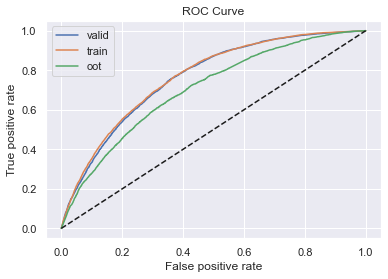

In [32]:
from Model.train import bi_train
res =  bi_train(data_woe[coef_keep + ex_lst], dep='label', exclude=ex_lst, model_switch=[1, 0, 0, 0])

In [33]:
coef_ = pd.DataFrame({'var_names': coef_keep, 'coef': res['model_lr'].coef_[0]})
coef_.sort_values(by='coef',ascending=False)

,var_names,coef
0,aft_v4up1_score,0.603369
3,91829_score,0.361318
5,fx_score_v03,0.212362
1,tongyong_v6_20220425_score,0.144355
2,model_risk_v7_glowirr_score,0.102454
4,fx_score_v01,0.087152


In [34]:
last_keep = coef_[coef_['coef'] > 0.1]['var_names'].to_list()
last_keep

['aft_v4up1_score',
 'tongyong_v6_20220425_score',
 'model_risk_v7_glowirr_score',
 '91829_score',
 'fx_score_v03']

num_features:  5
逻辑回归：
valid_auc :  0.7601239365951326  valid_ks :  0.395576043234372
recall:  [0.65580964 0.73296888]
train_auc :  0.7648113920096876  train_ks :  0.39521258542528537
recall:  [0.66057563 0.72859975]
oot_auc :  0.7025011474087313  oot_ks :  0.2952460643239311
recall:  [0.56665607 0.72567722]


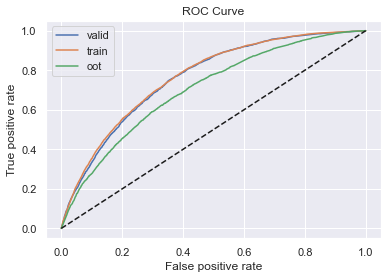

XGBoost：
[0]	train-rmse:0.38199	eval-rmse:0.38215
[100]	train-rmse:0.21150	eval-rmse:0.21657
[200]	train-rmse:0.21097	eval-rmse:0.21731
[212]	train-rmse:0.21091	eval-rmse:0.21737
valid_auc :  0.7303017361940016  valid_ks :  0.349251008415394
train_auc :  0.802492714448019  train_ks :  0.45463514469394234
oot_auc :  0.6696899800734564  oot_ks :  0.2539685681059954


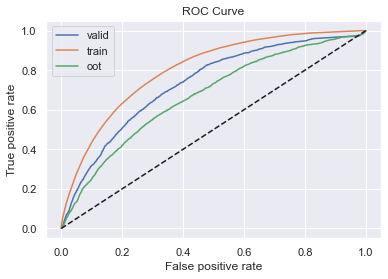

LightGBM：
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000663 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 35
[LightGBM] [Info] Number of data points in the train set: 108706, number of used features: 5
[LightGBM] [Info] Start training from score 0.051046
valid_auc :  0.7265164914964801  valid_ks :  0.3466131401866183
train_auc :  0.8062087982937328  train_ks :  0.4637124749806826
oot_auc :  0.6683157757210878  oot_ks :  0.2570984499220296


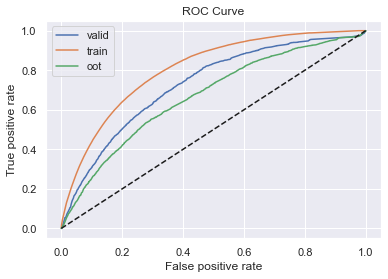

GBDT：
valid_auc :  0.7595730811791205  valid_ks :  0.39105871208370574
recall:  [1. 0.]
train_auc :  0.7687533640287356  train_ks :  0.4004298374912063
recall:  [1. 0.]
oot_auc :  0.7014308174749119  oot_ks :  0.3031360720350168
recall:  [1. 0.]


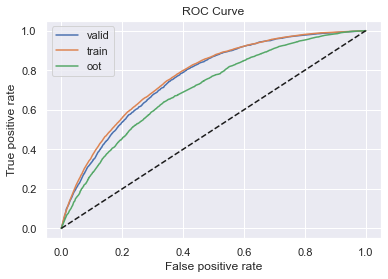

{'model_lr': LogisticRegression(C=0.1, class_weight='balanced', max_iter=2000, n_jobs=1,
                    solver='liblinear'),
 'model_xgb': <xgboost.core.Booster at 0x20a917afbb0>,
 'model_lgb': GradientBoostingClassifier(min_samples_leaf=5, min_samples_split=5,
                            n_estimators=80, subsample=0.7)}

In [37]:
bi_train(data_woe[last_keep + ex_lst], dep='label', exclude=ex_lst, model_switch=[1, 1, 1, 1])

In [38]:
# from ParameterRegulation.Optuna_cv import run, objective_lr_cv, objective_xgb_cv
# res_opt = run(objective_xgb_cv, data_woe[last_keep + ex_lst], ex_lst, 10, 20)

num_features:  5
model_type:  xgb
[0]	validation_0-auc:0.69564
[1]	validation_0-auc:0.69609
[2]	validation_0-auc:0.70121
[3]	validation_0-auc:0.70104
[4]	validation_0-auc:0.69995
[5]	validation_0-auc:0.70119
[6]	validation_0-auc:0.70030
[7]	validation_0-auc:0.69887
[8]	validation_0-auc:0.70054
[9]	validation_0-auc:0.69843
[10]	validation_0-auc:0.69988
[11]	validation_0-auc:0.70001
[12]	validation_0-auc:0.69899
[13]	validation_0-auc:0.69752
[14]	validation_0-auc:0.69556
[15]	validation_0-auc:0.69659
[16]	validation_0-auc:0.69500
[17]	validation_0-auc:0.69392
[18]	validation_0-auc:0.69234
[19]	validation_0-auc:0.69424
[20]	validation_0-auc:0.69589
[21]	validation_0-auc:0.69661
[22]	validation_0-auc:0.69775
[23]	validation_0-auc:0.69827
[24]	validation_0-auc:0.69758
[25]	validation_0-auc:0.69850
[26]	validation_0-auc:0.69905
[27]	validation_0-auc:0.69991
[28]	validation_0-auc:0.70007
[29]	validation_0-auc:0.69940
[30]	validation_0-auc:0.69985
[31]	validation_0-auc:0.70018
[32]	validation_

[267]	validation_0-auc:0.70146
[268]	validation_0-auc:0.70153
[269]	validation_0-auc:0.70156
[270]	validation_0-auc:0.70155
[271]	validation_0-auc:0.70155
[272]	validation_0-auc:0.70157
[273]	validation_0-auc:0.70157
[274]	validation_0-auc:0.70148
[275]	validation_0-auc:0.70146
[276]	validation_0-auc:0.70151
[277]	validation_0-auc:0.70153
[278]	validation_0-auc:0.70143
[279]	validation_0-auc:0.70143
[280]	validation_0-auc:0.70133
[281]	validation_0-auc:0.70135
[282]	validation_0-auc:0.70134
[283]	validation_0-auc:0.70135
[284]	validation_0-auc:0.70133
[285]	validation_0-auc:0.70132
[286]	validation_0-auc:0.70127
[287]	validation_0-auc:0.70126
[288]	validation_0-auc:0.70129
[289]	validation_0-auc:0.70132
[290]	validation_0-auc:0.70131
[291]	validation_0-auc:0.70125
[292]	validation_0-auc:0.70130
[293]	validation_0-auc:0.70129
[294]	validation_0-auc:0.70115
[295]	validation_0-auc:0.70117
[296]	validation_0-auc:0.70115
[297]	validation_0-auc:0.70115
[298]	validation_0-auc:0.70119
[299]	va

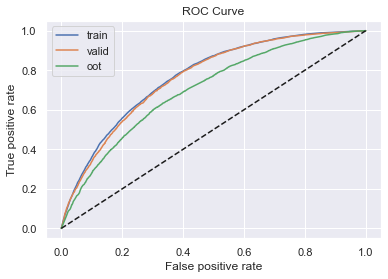

In [39]:
from Model.train import show
import xgboost as xgb
best_param = {'n_estimators': 690, 'reg_lambda': 0.0003799909131316302, 'reg_alpha': 2.1318293990473135e-05, 'max_depth': 3, 'learning_rate': 0.054707587003601406, 'colsample_bytree': 0.6496931650840058, 'min_child_weight': 0.1548750384041868, 'gamma': 2.8638205939624675e-06, 'subsample': 0.7292768062107774}
model = xgb.XGBClassifier(**best_param)
datasets = {'train': data_woe[data_woe['target'] == 'train'],
            'valid': data_woe[data_woe['target'] == 'valid'],
            'oot': data_woe[data_woe['target'] == 'oot']
           }

print('num_features: ', len(last_keep))
print('model_type: ', 'xgb')
model.fit(datasets['train'][last_keep], datasets['train']['label'],eval_metric='auc', sample_weight=datasets['train']['weight'],early_stopping_rounds=200,eval_set=[(datasets['oot'][last_keep], datasets['oot']['label'])])
# model.fit(datasets['train'][last_keep], datasets['train']['label'], sample_weight=datasets['train']['weight'])
show(model, last_keep, 'label', datasets)


In [40]:
# from ParameterRegulation.Optuna_cv import run, objective_lr_cv, objective_lgb_cv
# res_opt = run(objective_lr_cv, data_woe, ex_lst, 10, 20)

In [41]:
# from Model.train import show
# from sklearn.linear_model import LogisticRegression

# best_param = {'C': 0.010032367663690273, 'max_iter': 4577, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
# model = LogisticRegression(**best_param)
# datasets = {'train': data_woe[data_woe['target'] == 'train'],
#             'valid': data_woe[data_woe['target'] == 'valid'],
#             'oot': data_woe[data_woe['target'] == 'oot']
# }

# print('num_features: ', len(last_keep))
# print('model_type: ', 'lr')

# model.fit(datasets['train'][last_keep], datasets['train']['label'], sample_weight=datasets['train']['weight'])
# show(model, last_keep, 'label', datasets)

In [42]:
import pickle
# model.to_pickle(DATA_PATH + 'xgb_model3.pkl')
# 使用 pickle 保存模型
with open(FILE_PATH+'/up1_xgb_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [38]:
from ScoreCard.CreatReport import Report
for i in range((len(ft_used) // 1000) + 1):
    start, end = i * 1000, min((i + 1) * 1000, len(ft_used))
    print(start, ' - ', end)
    report = Report(data_woe[ft_used[start:end] + ex_lst].fillna(-999), ex_lst, 'label', FILE_PATH + str(i) + '_')
#     key_value, bins_detail = report.iv_ks_psi()
#     key_value, bins_detail = report.iv_ks_psi_chi2()
    key_value, bins_detail = report.iv_ks_psi_chi2_missing_quantile()

0  -  5
正在计算IV......
正在计算CHI2......


ValueError: k should be >=0, <= n_features = 5; got 10. Use k='all' to return all features.

In [ ]:
import os
files_key_value, files_bins_detail = [], []
for root, dirs, files in os.walk(FILE_PATH[:-1]): 
    for file in files:
        if '_bins_detail' in file:
            files_bins_detail.append(pd.read_csv(root +'/'+ file, encoding='utf-8-sig'))
        elif 'iv_ipt_psi_chi2_missing' in file:
            files_key_value.append(pd.read_csv(root +'/'+ file, encoding='utf-8-sig'))
            
key_value = pd.concat(files_key_value)
bins_detail = pd.concat(files_bins_detail)

bins_detail.to_csv(FILE_PATH + 'bins_detail_up11.csv', index=False, encoding='utf-8-sig')
key_value.to_csv(FILE_PATH + 'key_value_up11.csv', index=False, encoding='utf-8-sig')

打分

In [43]:
def proba2score(prob, pdo=30, rate=2, base_odds=35, base_score=750):
    factor = pdo / np.log(rate)
    offset = base_score - factor * np.log(base_odds)
    return factor * (np.log(1 - prob) - np.log(prob)) + offset

In [37]:
# model = model
ft_used = last_keep.copy()
data_end = data_woe[ft_used+ex_lst].copy()

In [45]:
pd.DataFrame({'var_names': ft_used}).to_csv(FILE_PATH + 'ft_used.csv',index=False)

In [46]:
data_end['proba'] = model.predict_proba(data_end[ft_used])[:, 1]
data_end['score'] = proba2score(data_end['proba'])
data_end['score']

0         801.935669
1         790.949646
9         801.935669
10        775.684326
11        790.949646
             ...    
462383    741.232178
462384    764.051514
462385    811.854858
462386    758.312134
462387    749.470825
Name: score, Length: 201948, dtype: float32

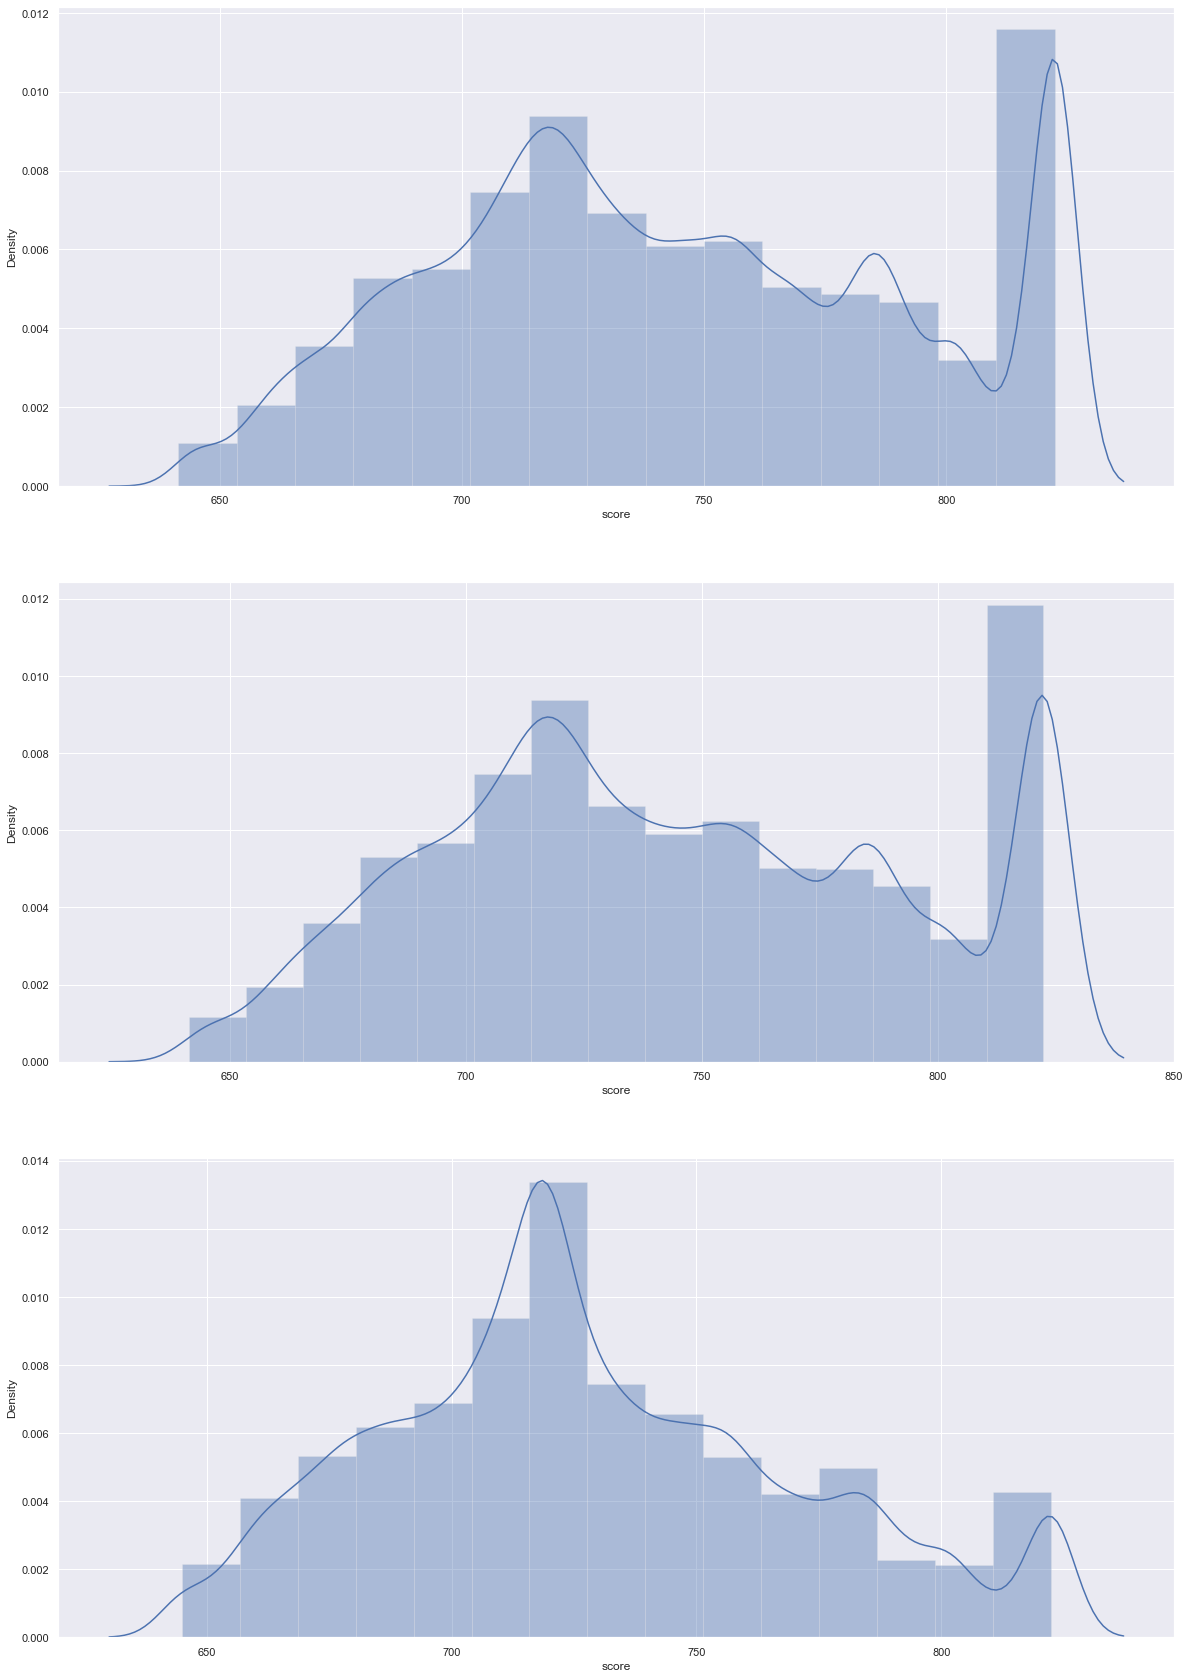

In [47]:
score_dev = data_end[data_end['target']=='train']['score']
score_val = data_end[data_end['target']=='valid']['score']
score_oot = data_end[data_end['target']=='oot']['score']

%matplotlib inline
fig, axes = plt.subplots(3,1)
plt.style.use('ggplot')

sns.distplot(score_dev,bins=15, ax=axes[0],kde_kws={"label":"train"})
sns.distplot(score_val,bins=15, ax=axes[1],kde_kws={"label":"valid"})
sns.distplot(score_oot,bins=15, ax=axes[2],kde_kws={"label":"oot"})
fig.set_figwidth(20)
fig.set_figheight(30)

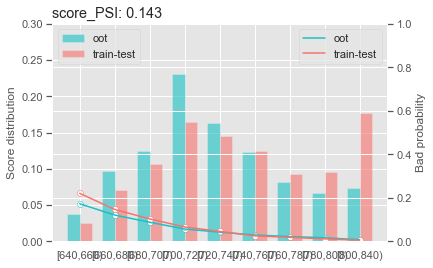

{'psi':   variable       PSI
 0    score  0.142964,
 'pic': {'score': <Figure size 432x288 with 2 Axes>}}

In [48]:
import scorecardpy as sc
score = data_end[['proba', 'score', 'label', 'target',]]
sc.perf_psi(
    score = {'train-test':score[score['target'].isin(['train','valid'])][['score']], 'oot':score[score['target']=='oot'][['score']]},
    x_tick_break= 20,
    label = {'train-test':score[score['target'].isin(['train','valid'])][['label']], 'oot':score[score['target']=='oot'][['label']] }
)

矫正

In [49]:
from sklearn.linear_model import LogisticRegression
platts_scaling = LogisticRegression(C=0.1,
                            class_weight='balanced',
                            max_iter=2000,
                            penalty='l2',
                            solver='liblinear',
                            verbose=0,
                            n_jobs=1)
platts_scaling.fit(data_end[data_end['target']=='train'][['proba']], data_end[data_end['target']=='train']['label'])

LogisticRegression(C=0.1, class_weight='balanced', max_iter=2000, n_jobs=1,
                   solver='liblinear')

In [50]:
data_end['proba_cor'] =  platts_scaling.predict_proba(data_end[['proba']])[:, 1]
data_end['score_cor'] = proba2score(data_end['proba_cor'])

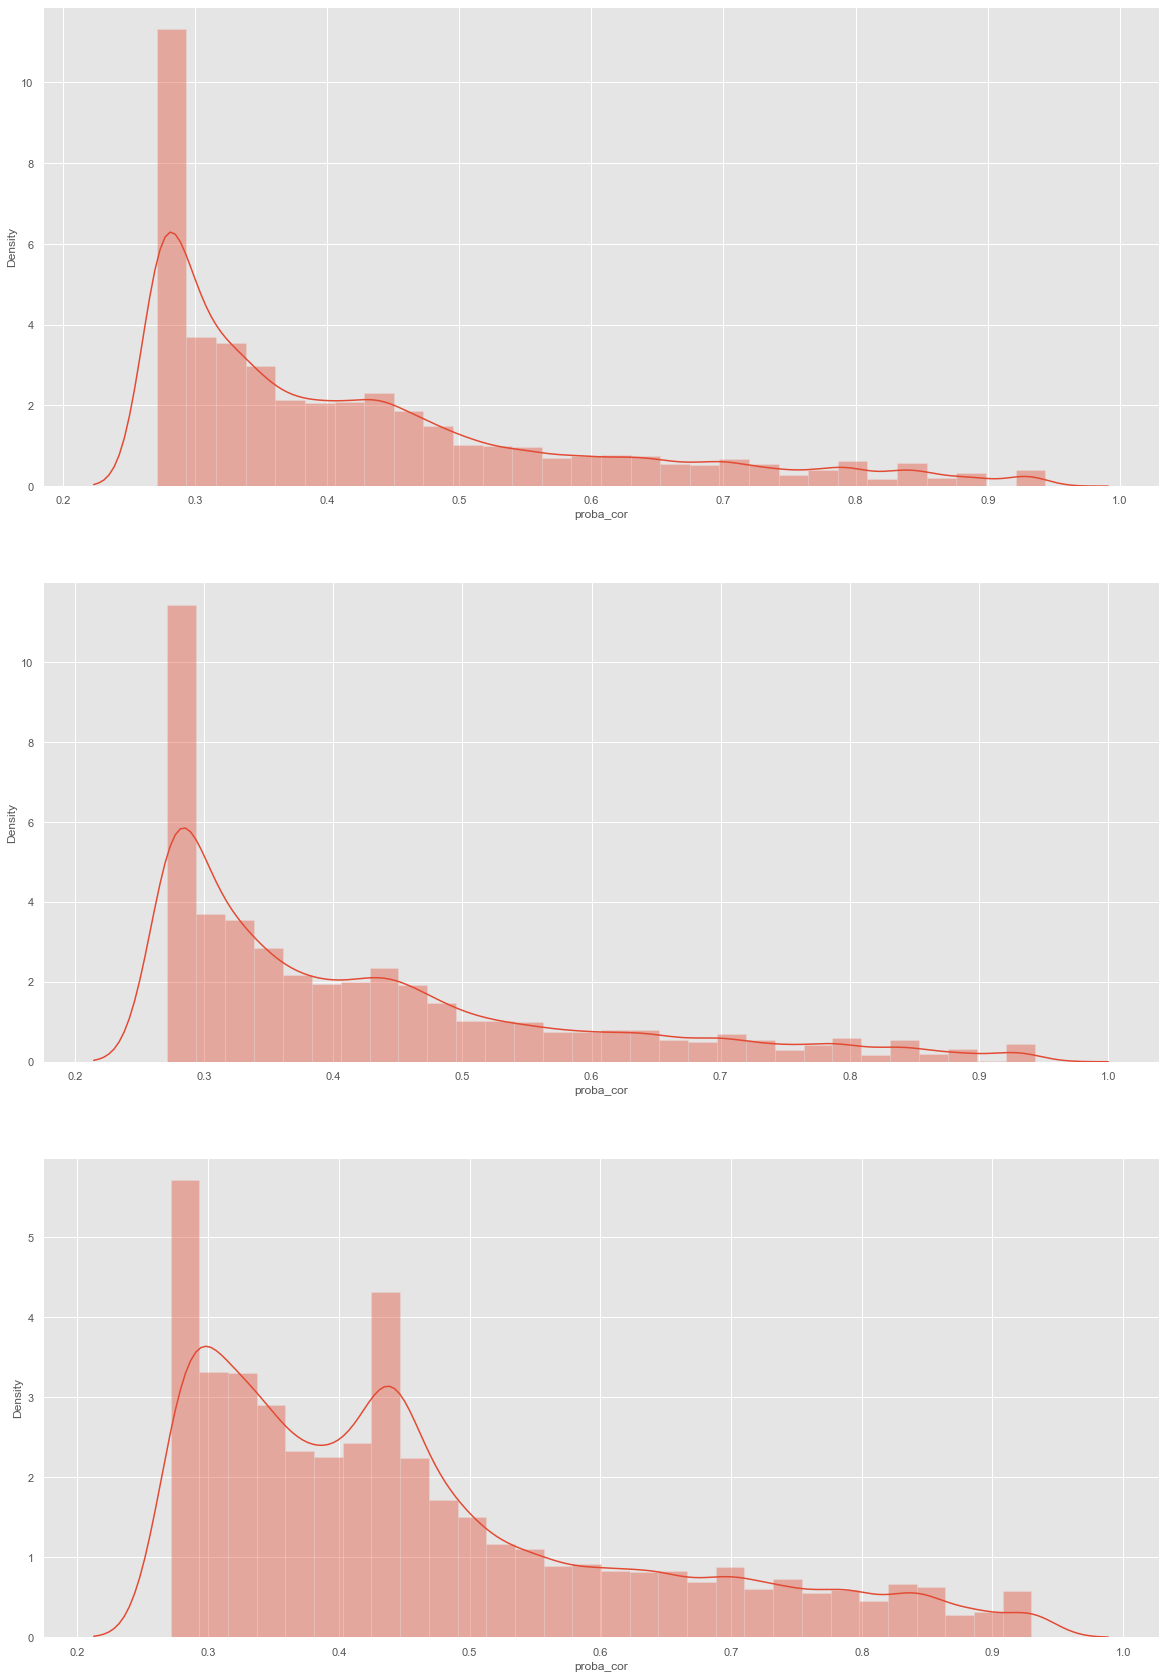

In [51]:
score_dev = data_end[data_end['target']=='train']['proba_cor']
score_val = data_end[data_end['target']=='valid']['proba_cor']
score_oot = data_end[data_end['target']=='oot']['proba_cor']

%matplotlib inline
fig, axes = plt.subplots(3,1)
plt.style.use('ggplot')

sns.distplot(score_dev,bins=30, ax=axes[0],kde_kws={"label":"train"})
sns.distplot(score_val,bins=30, ax=axes[1],kde_kws={"label":"valid"})
sns.distplot(score_oot,bins=30, ax=axes[2],kde_kws={"label":"oot"})
fig.set_figwidth(20)
fig.set_figheight(30)

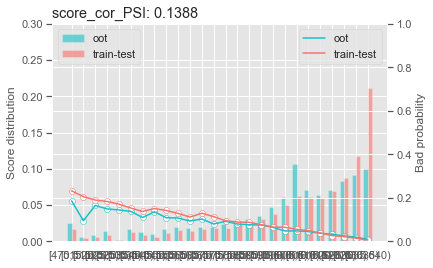

{'psi':     variable      PSI
 0  score_cor  0.13876,
 'pic': {'score_cor': <Figure size 432x288 with 2 Axes>}}

In [52]:
import scorecardpy as sc
score = data_end[['proba_cor', 'score_cor', 'label', 'target',]]
sc.perf_psi(
    score = {'train-test':score[score['target'].isin(['train','valid'])][['score_cor']], 'oot':score[score['target']=='oot'][['score_cor']]},
    x_tick_break= 5,
    label = {'train-test':score[score['target'].isin(['train','valid'])][['label']], 'oot':score[score['target']=='oot'][['label']] }
)

In [53]:
import toad
score_train_ks = toad.metrics.KS_bucket(data_end[data_end['target']=='train']['score_cor'], data_end[data_end['target']=='train']['label'], bucket=10)
score_train_ks.to_csv(FILE_PATH + 'score_train_ks_up1.csv', index=False, encoding='utf-8-sig')
score_train_ks

,min,max,bads,goods,total,bad_rate,good_rate,odds,bad_prop,good_prop,...,cum_bad_rate_rev,cum_bads_prop,cum_bads_prop_rev,cum_goods_prop,cum_goods_prop_rev,cum_total_prop,cum_total_prop_rev,ks,lift,cum_lift
0,474.330002,562.819714,1817,9042,10859,0.167327,0.832673,0.200951,0.327446,0.087653,...,0.051046,0.327446,1.000000,0.087653,1.000000,0.099893,1.000000,0.239794,3.277962,3.277962
1,562.916251,588.234534,1105,9747,10852,0.101825,0.898175,0.113368,0.199135,0.094487,...,0.038141,0.526581,0.672554,0.182140,0.912347,0.199722,0.900107,0.344442,1.994763,2.636569
2,588.293803,602.261614,764,10082,10846,0.070441,0.929559,0.075779,0.137682,0.097735,...,0.030197,0.664264,0.473419,0.279874,0.817860,0.299496,0.800278,0.384389,1.379947,2.217940
3,602.265578,610.601147,620,10083,10703,0.057928,0.942072,0.061490,0.111732,0.097744,...,0.024465,0.775996,0.335736,0.377619,0.720126,0.397954,0.700504,0.398377,1.134815,1.949963
4,610.604213,619.140573,472,10613,11085,0.042580,0.957420,0.044474,0.085060,0.102882,...,0.018993,0.861056,0.224004,0.480501,0.622381,0.499926,0.602046,0.380555,0.834152,1.722366
5,619.160845,626.461849,291,10332,10623,0.027393,0.972607,0.028165,0.052442,0.100158,...,0.014183,0.913498,0.138944,0.580659,0.519499,0.597649,0.500074,0.332839,0.536642,1.528486
6,626.519288,631.508020,214,10900,11114,0.019255,0.980745,0.019633,0.038566,0.105664,...,0.010974,0.952063,0.086502,0.686323,0.419341,0.699888,0.402351,0.265741,0.377209,1.360309
7,631.574078,635.131627,138,9518,9656,0.014292,0.985708,0.014499,0.024869,0.092267,...,0.008154,0.976933,0.047937,0.778590,0.313677,0.788715,0.300112,0.198343,0.279976,1.238639
8,635.260826,638.550210,73,9295,9368,0.007792,0.992208,0.007854,0.013156,0.090105,...,0.005573,0.990088,0.023067,0.868695,0.221410,0.874892,0.211285,0.121393,0.152656,1.131669
9,638.900435,638.900435,55,13545,13600,0.004044,0.995956,0.004061,0.009912,0.131305,...,0.004044,1.000000,0.009912,1.000000,0.131305,1.000000,0.125108,0.000000,0.079225,1.000000


In [54]:
score_valid_ks = toad.metrics.KS_bucket(data_end[data_end['target']=='valid']['score_cor'], data_end[data_end['target']=='valid']['label'])
score_valid_ks.to_csv(FILE_PATH + 'score_valid_ks_up1.csv', index=False, encoding='utf-8-sig')
score_valid_ks

,min,max,bads,goods,total,bad_rate,good_rate,odds,bad_prop,good_prop,...,cum_bad_rate_rev,cum_bads_prop,cum_bads_prop_rev,cum_goods_prop,cum_goods_prop_rev,cum_total_prop,cum_total_prop_rev,ks,lift,cum_lift
0,474.330002,562.684607,737,3915,4652,0.158426,0.841574,0.188250,0.309924,0.088553,...,0.051042,0.309924,1.000000,0.088553,1.000000,0.099852,1.000000,0.221372,3.103840,3.103840
1,562.743461,588.098749,476,4181,4657,0.102212,0.897788,0.113848,0.200168,0.094569,...,0.039130,0.510093,0.690076,0.183122,0.911447,0.199811,0.900148,0.326971,2.002499,2.552874
2,588.151326,602.061883,347,4302,4649,0.074640,0.925360,0.080660,0.145921,0.097306,...,0.031250,0.656013,0.489907,0.280428,0.816878,0.299599,0.800189,0.375586,1.462317,2.189641
3,602.107023,610.368954,270,4389,4659,0.057952,0.942048,0.061517,0.113541,0.099274,...,0.025068,0.769554,0.343987,0.379702,0.719572,0.399601,0.700401,0.389852,1.135384,1.925808
4,610.437305,619.388503,206,4467,4673,0.044083,0.955917,0.046116,0.086627,0.101038,...,0.019591,0.856182,0.230446,0.480740,0.620298,0.499903,0.600399,0.375442,0.863660,1.712694
5,619.394002,626.461849,129,4284,4413,0.029232,0.970768,0.030112,0.054247,0.096899,...,0.014679,0.910429,0.143818,0.577639,0.519260,0.594625,0.500097,0.332790,0.572700,1.531097
6,626.519288,631.588776,101,4792,4893,0.020642,0.979358,0.021077,0.042473,0.108389,...,0.011278,0.952902,0.089571,0.686028,0.422361,0.699650,0.405375,0.266873,0.404406,1.361969
7,631.691291,635.220472,51,3984,4035,0.012639,0.987361,0.012801,0.021447,0.090113,...,0.008004,0.974348,0.047098,0.776142,0.313972,0.786259,0.300350,0.198207,0.247627,1.239221
8,635.260826,638.550210,30,3901,3931,0.007632,0.992368,0.007690,0.012616,0.088236,...,0.006126,0.986964,0.025652,0.864378,0.223858,0.870635,0.213741,0.122586,0.149517,1.133614
9,638.900435,638.900435,31,5996,6027,0.005144,0.994856,0.005170,0.013036,0.135622,...,0.005144,1.000000,0.013036,1.000000,0.135622,1.000000,0.129365,0.000000,0.100770,1.000000


In [55]:
score_oot_ks = toad.metrics.KS_bucket(data_end[data_end['target']=='oot']['score_cor'], data_end[data_end['target']=='oot']['label'])
score_oot_ks.to_csv(FILE_PATH + 'score_oot_ks_up1.csv', index=False, encoding='utf-8-sig')
score_oot_ks

,min,max,bads,goods,total,bad_rate,good_rate,odds,bad_prop,good_prop,...,cum_bad_rate_rev,cum_bads_prop,cum_bads_prop_rev,cum_goods_prop,cum_goods_prop_rev,cum_total_prop,cum_total_prop_rev,ks,lift,cum_lift
0,484.292505,551.188339,680,3983,4663,0.145829,0.854171,0.170726,0.259443,0.090457,...,0.056181,0.259443,1.000000,0.090457,1.000000,0.099951,1.000000,0.168986,2.595709,2.595709
1,551.265064,576.800545,457,4204,4661,0.098048,0.901952,0.108706,0.174361,0.095476,...,0.046225,0.433804,0.740557,0.185933,0.909543,0.199859,0.900049,0.247871,1.745218,2.170555
2,576.821952,594.495258,365,4303,4668,0.078192,0.921808,0.084825,0.139260,0.097724,...,0.039755,0.573064,0.566196,0.283657,0.814067,0.299916,0.800141,0.289406,1.391793,1.910745
3,594.500995,603.756936,270,4391,4661,0.057927,0.942073,0.061489,0.103014,0.099723,...,0.034261,0.676078,0.426936,0.383380,0.716343,0.399824,0.700084,0.292698,1.031092,1.690938
4,603.901289,608.306705,217,4445,4662,0.046547,0.953453,0.048819,0.082793,0.100949,...,0.030321,0.758871,0.323922,0.484330,0.616620,0.499753,0.600176,0.274541,0.828514,1.518490
5,608.371252,615.844409,210,4445,4655,0.045113,0.954887,0.047244,0.080122,0.100949,...,0.027080,0.838993,0.241129,0.585279,0.515670,0.599533,0.500247,0.253714,0.802994,1.399411
6,615.858156,623.535908,168,4482,4650,0.036129,0.963871,0.037483,0.064098,0.101790,...,0.022587,0.903090,0.161007,0.687068,0.414721,0.699205,0.400467,0.216022,0.643086,1.291596
7,623.587405,629.403749,118,4487,4605,0.025624,0.974376,0.026298,0.045021,0.101903,...,0.018100,0.948111,0.096910,0.788972,0.312932,0.797912,0.300795,0.159140,0.456105,1.188240
8,629.415271,635.131627,92,4662,4754,0.019352,0.980648,0.019734,0.035101,0.105878,...,0.014425,0.983213,0.051889,0.894849,0.211028,0.899814,0.202088,0.088363,0.344462,1.092685
9,635.260826,638.900435,44,4630,4674,0.009414,0.990586,0.009503,0.016787,0.105151,...,0.009414,1.000000,0.016787,1.000000,0.105151,1.000000,0.100186,0.000000,0.167562,1.000000


In [56]:
SAVE_PATH = FILE_PATH + '建模报告/'
isExists=os.path.exists(SAVE_PATH)
if not isExists:
    os.makedirs(SAVE_PATH) 

特征重要性+iv+psi

In [57]:
feature_importance = pd.DataFrame({'var_names': ft_used, 'importance': model.feature_importances_}).sort_values(by='importance', ascending=False)
key_value = pd.read_csv(FILE_PATH + 'key_value_up1.csv')
key_value = key_value[key_value['var_names'].isin(ft_used)]
result = pd.merge(feature_importance, key_value, on='var_names')
result.to_csv(SAVE_PATH + 'ipt_iv_psi.csv', index=False, encoding='utf-8-sig')

样本得分

In [58]:
data_end[ex_lst + ['proba_cor', 'score_cor']].to_csv(SAVE_PATH + 'score_cor.csv', index=False, encoding='utf-8-sig')

important前十分箱

In [59]:
ft_used_can=pd.read_csv('E:/fulin/test/up1/ft_used.csv')
ft_used=[]
for i in ft_used_can.values.tolist():
    ft_used.append(i)
ft_used = [num for elem in ft_used for num in elem]

ft_used

['aft_v4up1_score',
 'tongyong_v6_20220425_score',
 'model_risk_v7_glowirr_score',
 '91829_score',
 'fx_score_v03']

In [60]:
bins_detail=pd.read_csv( 'E:/fulin/test/up1/bins_detail_up1.csv')

In [61]:
ft_bin = bins_detail.loc[bins_detail['variable'].isin(ft_used)]
ft_bin.to_csv('E:/fulin/test/up1/ft_bin.csv', index=False, encoding='utf-8-sig')